# Holiday Crimes in Michigan 2015

__Questions to resolve__: 
* How the number of crimes is affected on holidays?
* Is is possible the number of incidents increase in those kind of days?

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib notebook

# use the 'seaborn-colorblind' style
plt.style.use('seaborn-colorblind')

### Getting Dataset

In [117]:
#SOURCE: https://www.officeholidays.com/countries/usa/regional.php?list_year=2015&list_region=Michigan
holidays = pd.read_csv('michigan-holidays.csv')
holidays.set_index('Day',inplace=True)
holidays.head()

,Date,Holiday,Comments
Day,,,
2015-01-01,January 01,New Years Day,NaN
2015-01-19,January 19,Martin Luther King Jr. Day,Third Monday in January
2015-02-16,February 16,Presidents' Day,3rd Monday in February. Not all states
2015-05-10,May 10,Mother's Day,2nd Sunday in May. Not a public holiday
2015-05-25,May 25,Memorial Day,Last Monday in May


In [119]:
#SOURCE: https://crime-data-explorer.fr.cloud.gov/downloads-and-docs
#MI-2015

incidents = pd.read_csv('nibrs_incident.csv')
incidents.head(3)

,agency_id,incident_id,nibrs_month_id,incident_number,cargo_theft_flag,submission_date,incident_date,report_date_flag,incident_hour,cleared_except_id,cleared_except_date,incident_status,data_home,ddocname,orig_format,ff_line_number,did
0,9033,80186631,6787376,150150000216,NaN,NaN,2015-01-06 00:00:00,NaN,0.0,6,NaN,0,C,2015_01_MI8136600_150150000216_INC,NaN,NaN,NaN
1,9033,80186632,6787376,150150000340,NaN,NaN,2015-01-09 00:00:00,NaN,2.0,6,NaN,0,C,2015_01_MI8136600_150150000340_INC,NaN,NaN,NaN
2,9033,80186633,6787376,150150000354,NaN,NaN,2015-01-06 00:00:00,NaN,12.0,6,NaN,0,C,2015_01_MI8136600_150150000354_INC,NaN,NaN,NaN


### Processing Data

In [120]:
incidents.incident_date =  pd.to_datetime(incidents.incident_date)
incidents.set_index('incident_date', inplace=True)
incidents.head()

incidents = (incidents.resample('D')
                        .incident_id.count()
                        .to_frame()
                        .rename(columns={'incident_id':'incident_count'}) )

incidents[incidents.index.month==1].head(2)

,incident_count
incident_date,
2015-01-01,1799
2015-01-02,1364


In [121]:
incidents_mean = (incidents.groupby(pd.TimeGrouper(freq='M'))
                                      .mean()
                                      .rename(columns={'incident_count':'incident_mean'}))

incidents_mean[incidents_mean.index.month==1].head(2)

,incident_mean
incident_date,
2015-01-31,1196.096774


In [122]:
incidents['incident_mean'] = 0
for i in range(1,13):
    incidents.at[incidents.index.month==i, 'incident_mean'] = incidents_mean[incidents_mean.index.month==i].incident_mean.mean()

incidents[incidents.index.month==1].head(2)

,incident_count,incident_mean
incident_date,,
2015-01-01,1799,1196.096774
2015-01-02,1364,1196.096774


### Plotting

<IPython.core.display.Javascript object>


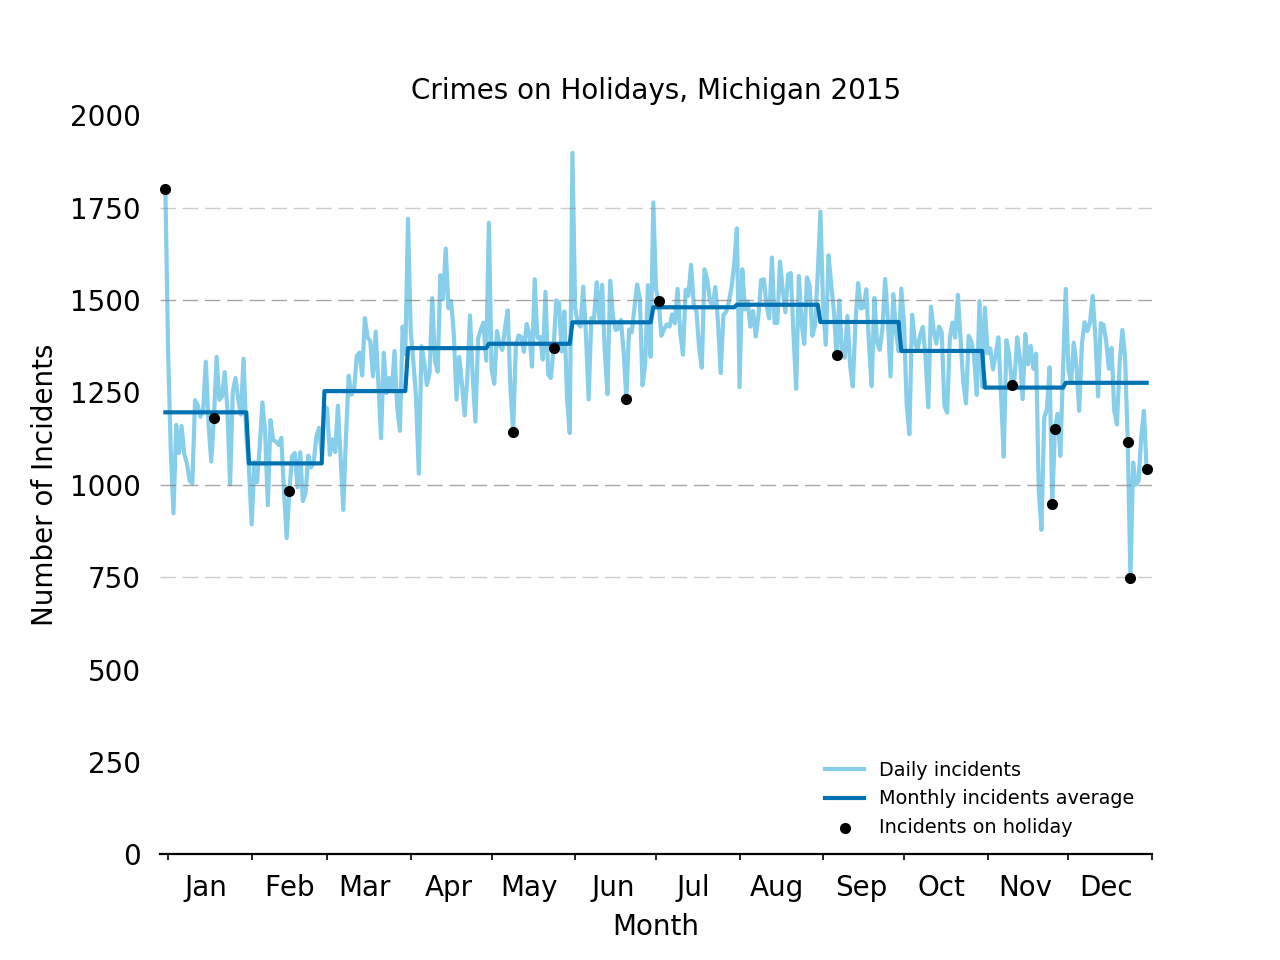

(16434, 16802)

In [126]:
fig, ax = plt.subplots()#figsize=(9,5))

incidents.incident_count.plot(kind='line', color='skyblue', ax=ax, label='Daily incidents')
incidents.incident_mean.plot(ax=ax, label='Monthly incidents average')

#holidays
holiday_dates = holidays.index.values
holi = incidents.loc[incidents.index.isin(holiday_dates)]
ax.scatter(holiday_dates, holi.incident_count, zorder=10, color='black', marker='.', label='Incidents on holiday')

#styles
ax.legend(loc=4, fontsize='x-small', frameon=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_title('Crimes on Holidays, Michigan 2015', fontsize='medium')
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax.tick_params(axis='x', which='major', bottom='off')
ax.tick_params(axis='y', which='major', left='off')
ax.set_xlabel('Month')
ax.set_ylabel('Number of Incidents');
ax.axhline(y=1750, linestyle='--', color='gray', linewidth=0.5, alpha=0.4)
ax.axhline(y=1500, linestyle='--', color='gray', linewidth=0.5, alpha=0.7)
ax.axhline(y=1000, linestyle='--', color='gray', linewidth=0.5, alpha=0.7)
ax.axhline(y=750, linestyle='--', color='gray', linewidth=0.5, alpha=0.4)
ax.set_ylim(0,2000)
ax.set_xlim(pd.Timestamp('2014-12-30'), pd.Timestamp('2016-01-2'))